#Домашнє завдання

Налаштувалися на виконання нового завдання? Тодi полетiли!

Сьогодні ви використаєте розклад SVD для стиснення зображень. Цей підхід може знадобитись при обробці цифрових сигналів при підготовці даних для моделі машинного навчання.

Це допоможе закрiпити такі навички:  

- Робота з матричним поданням зображень.
- Застосування матричних докомпозицій.

##Завдання (крок за кроком)

Для цієї задачі використайте файл, котрий ви отримали у результаті виконання першого ДЗ.

1. Підготуйте декілька зображень. Це можуть бути RGB або зображення у градації сірого, наприклад, у jpg форматі.

2. Виведіть зображення в Colab за допомогою функції imread з бібліотеки matplotlib.
3. Визначить розмір зображення за допомогою функції shape.
4. Оскільки SVD можна застосувати лише до 2D-даних, ми можемо або виконати його для кожного каналу кольору окремо, або ми можемо змінити форму зображення з 3D-матриці на 2D-матрицю, згладивши кожен колірний канал і склавши їх горизонтально (або вертикально).

Наприклад, можна застосувати функцію reshape, що змінює форму зображення у 2D-матрицю шляхом укладання кольорових каналів горизонтально:

```
height, width, channels = image.shape
flat_image = image.reshape(-1, width * channels)

```
5. Застосуйте SVD декомпозицію за допомогою функції svd з бібліотеки numpy.

6. Візуалізуйте перші $k$ значень матриці Σ. Для цього можна використати matplotlib:
```
plt.plot(np.arange(k), S[:k])
```
7. Якщо на діаграмі ми побачимо суттєве зниження значень власних чисел з матриці Σ, це буде означати, що ми можемо ефективно стиснути зображення без значної втрати точності. Наприклад, щоб скоротити зображення, яке буде відповідати першим 100 значенням можна використовувати алгоритм усіченого SVD (функція TruncatedSVD):

```
svd = TruncatedSVD(n_components= 100 )
truncated_image = svd.fit_transform(flat_image)

```

8. Щоб побачити, скільки інформації було втрачено під час стиснення, ми можемо виміряти помилку реконструкції зображення. Ми вимірюватимемо похибку реконструкції як середнє квадратичних похибок (MSE) між значеннями пікселів оригінального зображення та реконструйованого зображення.

У Scikit-Learn реконструйоване зображення можна отримати викликом методу inverse_transform трансформатора TruncatedSVD:

```
reconstructed_image = svd.inverse_transform(truncated_image)

```
А помилку реконструкції можна розрахувати:
```
reconstruction_error = np.mean(np.square(reconstructed_image - flat_image))
reconstruction_error
```

9. Щоб візуалізувати реконстуйоване зображення, нам спочатку потрібно змінити його форму в оригінальну 3D-форму, а потім обрізати значення пікселів до цілих чисел у діапазоні [0, 255]:
```
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0 , 255 ).astype( 'uint8' )

plt.imshow(reconstructed_image)
plt.axis( 'off' )

```

10. Виконайте експерименти із використання різних значень $k$ - власних чисел з матриці Σ та візуалізуйте результати. При яких значеннях помітна втрата якості зображення?


### **Підказки**

Для виконання завдання використовуйте функції numpy, sklearn та алгоритми з конспекту до цієї теми.

### **Формат здачі**

Посилання на Google Colab, прикріплений файл ipynb

### **Критерії прийому завдання**

- Усі вказані етапи виконані та проведені обчислювальні експерименти з різними ступенями стискання.
- До Colab додані висновки.

### **Формат оцінювання**

- Залiк / Незалiк

Приклад

Генерація температурної матриці (імітація сенсорних даних)

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from matplotlib.image import imread
import urllib.request
from PIL import Image
import io



def generate_temperature_matrix(n=100):
    x = np.linspace(0, 10, n)
    y = np.linspace(0, 10, n)
    X, Y = np.meshgrid(x, y)

    Z = (np.sin(X) + np.cos(Y)) * np.exp(-((X - 5)**2 + (Y - 5)**2) / 10)
    Z += 0.2 * np.random.randn(n, n)
    return x, y, Z


Стиснення температурної матриці через TruncatedSVD

In [ ]:
def compress_temperature_matrix(Z, n_components):
    """
    Приводить 2D теплову матрицю до стислого вигляду за допомогою TruncatedSVD і реконструює її.
    """
    height, width = Z.shape
    flat_Z = Z.reshape(height, width)  # Просто переконаємось, що 2D

    svd = TruncatedSVD(n_components=n_components)
    Z_trunc = svd.fit_transform(flat_Z)
    Z_recon = svd.inverse_transform(Z_trunc)

    return np.clip(Z_recon, Z.min(), Z.max())


Оцінка результату стискання

In [ ]:
x, y, Z = generate_temperature_matrix()
k_values = [5, 15, 30, 60]


Text(0, 0.5, 'Magnitude of singular value')

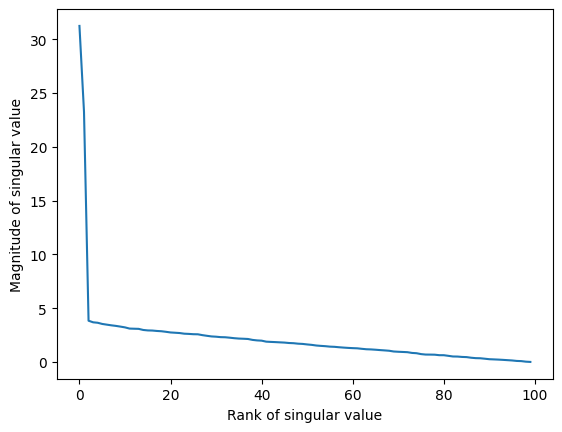

In [ ]:
U, S, Vt = np.linalg.svd(Z)

k = 100
plt.plot(np.arange(k), S[:k])
plt.xlabel('Rank of singular value')
plt.ylabel('Magnitude of singular value')

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'surface'}]*3, [{'type': 'surface'}]*3],
    subplot_titles=["Оригінал", "k=5", "k=15", "k=30", "k=60", ""]
)

fig.add_trace(
    go.Surface(z=Z, x=x, y=y, colorscale='Hot', showscale=False),
    row=1, col=1
)

for idx, k in enumerate(k_values):
    Z_k = compress_temperature_matrix(Z, k)
    fig.add_trace(
        go.Surface(z=Z_k, x=x, y=y, colorscale='Hot', showscale=False),
        row=(idx + 1) // 3 + 1,
        col=(idx + 1) % 3 + 1
    )

fig.update_layout(
    title="TruncatedSVD стискання температурної матриці (3D Plotly)",
    height=800,
    width=1200,
    margin=dict(l=10, r=10, b=10, t=50)
)

fig.show()






Робота із зображеннями

https://medium.com/@fasateaniket5/unlocking-color-codes-a-beginners-guide-to-extracting-rgb-values-from-images-with-python-dd6f8010dba2

Форма зображення (H x W x C): (662, 640, 3)


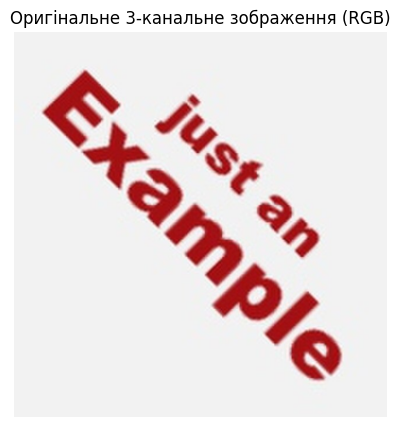

In [ ]:

# 1. Завантаження зображення з інтернету
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/640px-Example.jpg"
with urllib.request.urlopen(url) as response:
    image = Image.open(io.BytesIO(response.read()))
    image = image.convert("RGB")
    image_np = np.array(image)

print("Форма зображення (H x W x C):", image_np.shape)


plt.figure(figsize=(5, 5))
plt.imshow(image_np)
plt.title("Оригінальне 3-канальне зображення (RGB)")
plt.axis("off")
plt.show()


Форма 2-канального зображення: (662, 640, 2)


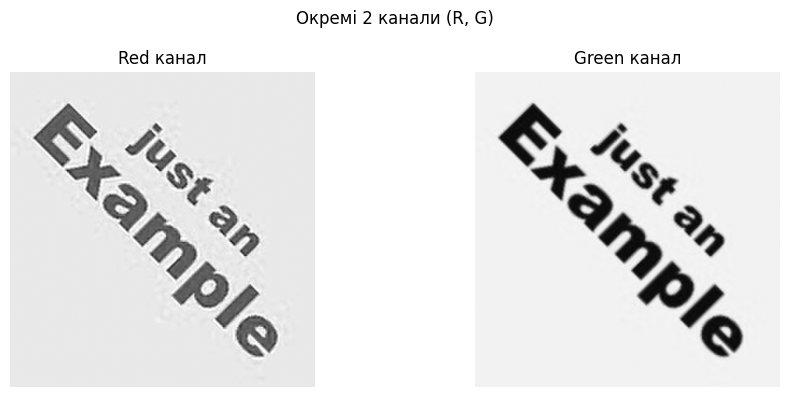

In [ ]:
image_2ch = image_np[:, :, :2]
print("Форма 2-канального зображення:", image_2ch.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
channels = ['Red', 'Green']

for i in range(2):
    axes[i].imshow(image_2ch[:, :, i], cmap='gray')
    axes[i].set_title(f"{channels[i]} канал")
    axes[i].axis("off")

plt.suptitle("Окремі 2 канали (R, G)")
plt.tight_layout()
plt.show()


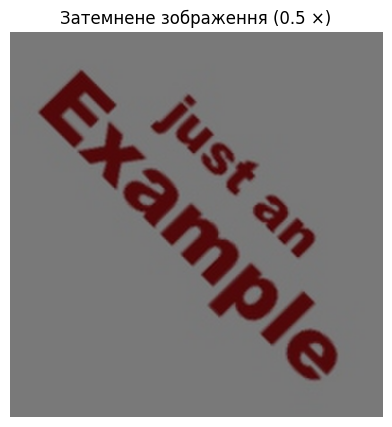

In [ ]:
darkened = (image_np * 0.5).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(darkened)
plt.title("Затемнене зображення (0.5 ×)")
plt.axis("off")
plt.show()


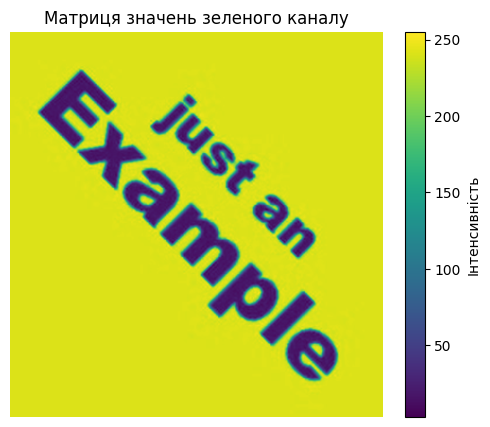

In [ ]:
green_channel = image_np[:, :, 1]
plt.figure(figsize=(6, 5))
plt.imshow(green_channel, cmap='viridis')
plt.title("Матриця значень зеленого каналу")
plt.colorbar(label="Інтенсивність")
plt.axis("off")
plt.show()
